In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('diamonds.csv')

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

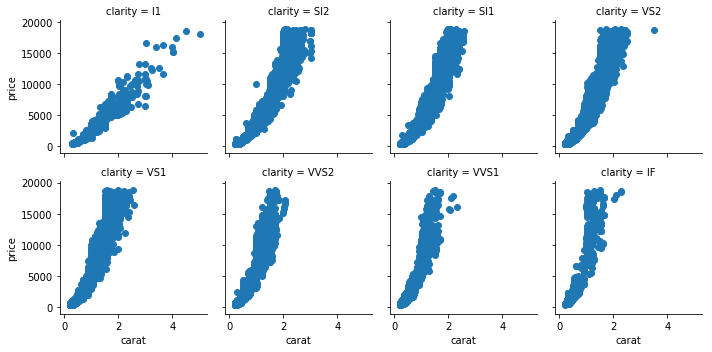

In [5]:
# multivariate plot of price by carat weight, and clarity
g = sb.FacetGrid(data = df, col = 'clarity', height = 2.5, margin_titles = True, col_wrap = 4);
g.map(plt.scatter, 'carat', 'price')

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [7]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
df_sub = df[(df['carat'] > 0.9) & (df['carat'] < 1.1)]

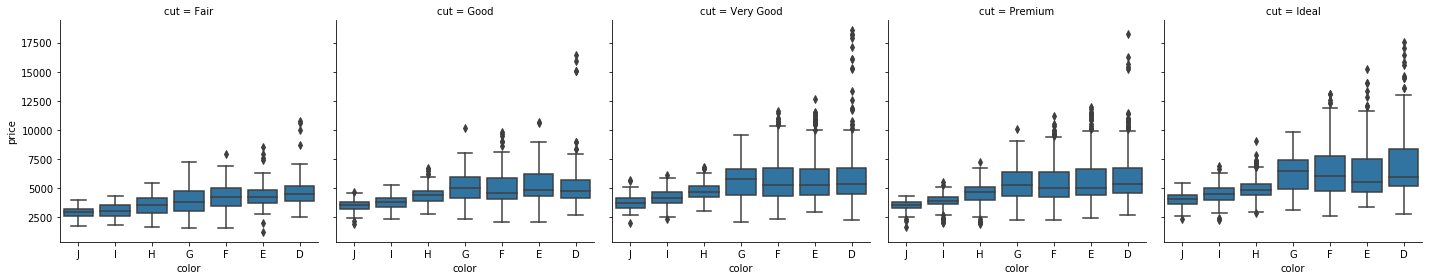

In [10]:
g = sb.FacetGrid(data = df_sub, col = 'cut', height = 4, col_wrap = 5, col_order = ordinal_var_dict['cut'])
g.map(sb.boxplot, 'color', 'price', order = ordinal_var_dict['color'])